# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done successfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the next sprint!

# Machine Learning for Megaline plan recommendation

# Project description

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

# Data description

`сalls` — number of calls,

`minutes` — total call duration in minutes,

`messages` — number of text messages,

`mb_used` — Internet traffic used in MB,

`is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

# Outline

<div> 
    <ol>
      <li><a href="#1">Open and look through the data file</a></li>
      <li><a href="#2">Split the source data</a></li>
      <li><a href="#3">Hyperparameters Tunning</a></li>
      <li><a href="#4">Quality Assesment</a></li>
      <li><a href="#5">Sanity check the model</a></li>
      <li><a href="#6">Overall conclusion</a></li>
    </ol> 
</div>

# <a id="1">Open the data file and study the general information

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn for visualization
import seaborn as sns
#Statistical functions
from scipy import stats
# import train_test_split to split data
from sklearn.model_selection import train_test_split

# import machine learning module from the sklearn library
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from sklearn.ensemble import AdaBoostClassifier # import adaboost classifier algorithm

# import metrics for sanity check on model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

In [2]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe)
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
print('Data has been read correctly')

Data has been read correctly


In [4]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

----------------------------------------------------------------------------------------------------
Describe:



,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


----------------------------------------------------------------------------------------------------


<bound method NDFrame.describe of       calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]>


Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(3214, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [5]:
#change messages and calls type to int
df['messages'] = df['messages'].astype(int) 
df['calls'] = df['calls'].astype(int)

**Conclusion**

- The data has already been preprocessed, and is ready for modeling. 
- Let's move to the spliting part.

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    The data was loaded and inspected!
</div>

# <a id="2">Split the source data

Let's start by splitting the source dataset into 
- 60% training set
- 20% validation set
- 20% testing sets

To do this we will need to use `sklearn.model_selection.train_test_split` twice.

- First we split the whole data into two parts: 
    - 80% train
    - 20% test
- Then we split the 80% training obtained set into:
    - 60% train set
    - 20% validation set

In [6]:
# split data into training and testing 
df_train, df_test = train_test_split(df, test_size=0.20, random_state=12345)

# split train data into validation and train 
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345) # 0.25 * 0.80 = 0.20 for validation size

In [7]:
# display the shape of the split dataset
print('Train set contains {}'.format(df_train.shape[0]) + ': 60% of the data') 
print('Validation set contains {}'.format(df_valid.shape[0]) + ': 20% of the data')
print('Test set contains {}'.format(df_test.shape[0]) + ': 20% of the data')

Train set contains 1928: 60% of the data
Validation set contains 643: 20% of the data
Test set contains 643: 20% of the data


In [8]:
# declare Features and Targets 
#train
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
#valid
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
#test
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print('')
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Valid features :',features_valid.shape)
print('Valid target   :',target_valid.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)


Train features : (1928, 4)
Train target   : (1928,)
Valid features : (643, 4)
Valid target   : (643,)
Test features  : (643, 4)
Test target    : (643,)


- Now that we've splited the data succesfully, we are able to move to the next step.

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    The data was split into train, validation and test sets at a reasonable ratio
</div>

# <a id="3">Hyperparameters Tunning

- We now, will build and investigate the quality of different models by tunning the hyperparameters, and see what we can conclude.
- Since it's a classification task, we will investigate through the following classifiers, and decide after the results which is the best for our model:
    - decision tree classifier, 
    - logistic regression, 
    - random forest.

## Decision Tree

Creating this decision tree classifier function to 
- train the model, 
- make prediction on train and validation dataset, 
- print model accuracy for training and validation datasets 
- and plot model accuracy scores on train and validation sets for visual comparison


In [9]:
# create the decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the tree depth
    tree_depth = [i for i in range(1, 21)]
    # create a loop for max_depth from 1 to 21
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # create an instance of a class
        model.fit(X_train, y_train) # train the model
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('Max depth and accuracy for decision tree classifier')
        print('-'*40)
        print("\033[1m" + 'max_depth = {}'.format(depth) + "\033[0m")
        print('Training set: {:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation set: {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
    # plot of train and validation scores vs tree depth
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Train')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs tree depth')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 1
Training set: 0.758
Validation set: 0.739

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 2
Training set: 0.792
Validation set: 0.757

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 3
Training set: 0.812
Validation set: 0.765

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 4
Training set: 0.821
Validation set: 0.764

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 5
Training set: 0.827
Validation set: 0.759

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 6
Training set: 0.834
Validation set: 0.757

Max depth and accuracy for decision tree classifier
----------------------------------------
max_dep

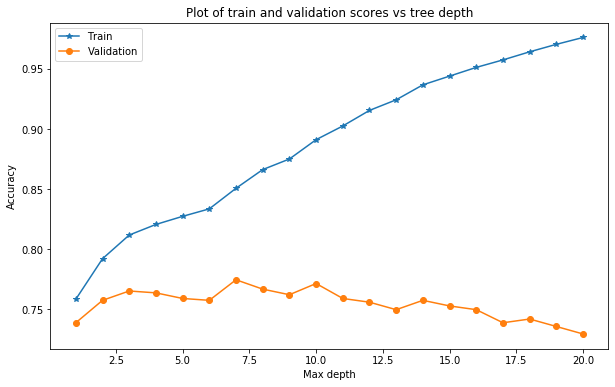

In [10]:
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

**Conclusion**

The decision tree classifier can determine the right plan when we run a learning algorithm to train the model to make predictions. 

- By creating a loop for max_depth hyperparameter from 1 to 20, we can see what depth gives us the best fit. 
- We note that decision trees with few depth generally do not overfit but have poor performance (high bias, low variance).
- deep trees (i.e. high depth) generally do overfit and have good performance (low bias, high variance). 
- Our desirable tree depth is one that is not so shallow and has low performance, and also not so deep that overfits the training dataset. 
- We need to have a balance between bias and variance - bias variance tradeoff. 
- We plot the model accuracy scores on the train and validation sets to visualize this. 
- We can notice how the accuracy of the validation test keeps increasing until it gets to max_depth of ~4. After this depth, the accuracy starts to decline. 
- At max_depth of 4, we have an accuracy of 82.05% for the training set, and 76.36% for the validation set. We choose a tree depth of 4 before the model begins to overfit the training dataset.

<div class="alert alert-warning">
    <b>Reviewer's comment</b><br>
    Isn't maximum validation set accuracy achieved at max_depth of 7?
</div>

## Logistic Regression

Creating this logistic regression model function 
- to train the model, 
- make prediction on train and validation dataset, 
- print model accuracy for training and validation datasets

In [11]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_valid, y_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predictions_valid = model.predict(X_valid) # make predictions on validation set
    print('Accuracy for logistic regression model')
    print('-'*40)
    print('Training set:', accuracy_score(y_train, train_predictions))
    print('Validation set:', accuracy_score(y_valid, predictions_valid))

In [12]:
logistic_regression(features_train, target_train, features_valid, target_valid)

Accuracy for logistic regression model
----------------------------------------
Training set: 0.703838174273859
Validation set: 0.6967340590979783


- The model training is fast, but the accuracy is lower. 
- The logistic regression model gave an accuracy of 70.38% for the training set, and about 69%/70% for the validation sets. This is lower than our target 75% accuracy. 
- We can see here that neither the training nor the validation score is high. 
- This is because the model is not complex enough hence underfitting occurs. 
- We cannot use this model since both training and validation scores are low.

## Random Forest 

Creating this random forest classifier function to:
- train the model, 
- make prediction on train and validation dataset, 
- print model accuracy for training and validation datasets
- visualize model accuracy scores on train and validation sets

In [13]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_valid, y_valid):
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the n_estimator range
    estimator_depth = [i for i in range(1, 21)]
    # create a loop for n_estimator from 1 to 21
    for estimator in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
        model.fit(X_train, y_train) # train the model 
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('n_estimator and accuracy for random forest classifier')
        print('-'*40)
        print("\033[1m" + 'n_estimator = {}'.format(estimator) + "\033[0m")
        print('Training set: {:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation set: {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
    # plot of train and validation scores vs n_estimator
    plt.figure(figsize=(10,6))
    plt.plot(estimator_depth, train_scores, '-*', label='Train')
    plt.plot(estimator_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs n_estimator')
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 1
Training set: 0.902
Validation set: 0.703

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 2
Training set: 0.910
Validation set: 0.757

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 3
Training set: 0.959
Validation set: 0.745

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 4
Training set: 0.948
Validation set: 0.765

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 5
Training set: 0.971
Validation set: 0.762

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 6
Training set: 0.965
Validation set: 0.770

n_estimator and accuracy for random forest classifier
----------------------

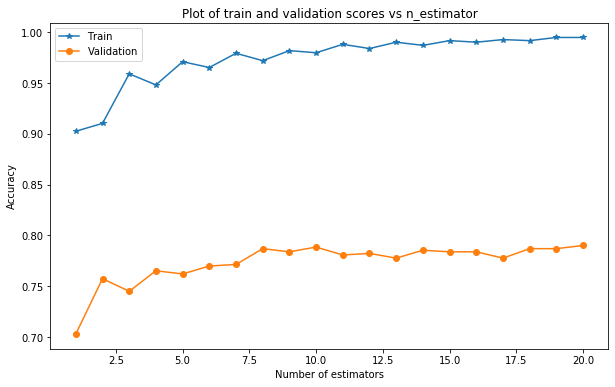

In [14]:
random_forest_classifier(features_train, target_train, features_valid, target_valid)

- We make the random_state parameter pseudorandomness static. 
- We also set the number of trees in the forest using n_estimators hyperparameter. 
- Using n_estimator value of 10, the random forest classifier gave an accuracy of 98.0% for the training data, and 78.80% for the validation data.

<div class="alert alert-warning">
    <b>Reviewer's comment</b><br>
    Looking at the learning curve, it seems that we might still grow the number of trees to achieve a better validation accuracy (in fact, now the maximum validation accuracy is achieved by a model with n_estimators = 20 
</div>

## Conclusion

From the investigation of different models, we can see that:
- At n_estimators = 10, the random forest gives an accuracy of 98.0% for the training data, and 78.80% for the validation data.
- The least accurate model was logistic regression with an accuracy of 70.38% for the training set, and about 69.67% for the validation sets.
- So we will choose the random forest classifier to test prediction on the test data.

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Great! You tried a couple of different models and tuned their hyperparameters correctly utilizing the train and validation sets
</div>

# <a id="4">Quality Assesment

## Model testing

From the previous steps, we concluded that random forest classifier is the most accurate model. Let’s use it for our final model.

In [15]:
# Testing the random forest classifier model quality
model = RandomForestClassifier(random_state=12345, n_estimators=10)
model.fit(features_train, target_train) # train the model 
model.score(features_train, target_train) # check the model's accuracy with score() method
test_predictions = model.predict(features_test) # make predictions on test set    

print('Test set:', accuracy_score(target_test, test_predictions))

Test set: 0.7869362363919129


Using a **random forest classifier**, when testing the model with the test set, the **accuracy obtained is 78.69%**

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Final model was evaluated on the test set correctly
</div>

# <a id="5">Sanity check the model

- In this section, we want to get an idea of the accuracy of the model on our validation set. 
- We can fit the model on the training set and make predictions on the validation set, then evaluate the effectiveness of our algorithm. 
- We can judge the effectiveness of the machine learning algorithm by computing the 
    - precision, 
    - recall,
    - F1 score. 
    - balanced accuracy score, 
    - ROC score, 
    - confusion matrix, 
    - classification report.

In [16]:
# function to compute the precision, recall, and F1 score
def show_sanity_check(X_train, y_train, X_valid, y_valid):
    """
    This function computes the confusion matrix, precision, recall,
    F1-score, accuracy score, balanced accuracy score, ROC score as
    a way to judge the effectiveness of the machine learning algorithm
    """
    model = RandomForestClassifier(random_state=12345)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_valid) 
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Recall: ' + "\033[0m", recall_score(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'F1-score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'ROC Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_valid, predictions_valid))
    print()

In [17]:
show_sanity_check(features_train, target_train, features_valid, target_valid)

Confusion Matrix
--------------------------------------------------
[[404  39]
 [ 97 103]]

Recall:  0.515

Precision:  0.725

F1-score:  0.602

Accuracy Score:  78.85%

Balanced Accuracy Score:  71.35%

ROC Score:  71.35%

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       443
           1       0.73      0.52      0.60       200

    accuracy                           0.79       643
   macro avg       0.77      0.71      0.73       643
weighted avg       0.78      0.79      0.78       643




/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Conclusion**

- The confusion matrix gives us insight into how well our predictions hold up to the actual values and how correct our predictions are. 
- The precision of our model is 0.725. So the proportion of positive identifications was actually correct of 72.5%.
- The Recall is 0.515, it gives the measure of how accurate our model is in identifying pattern in data. It is not close to one. 
- The F1-score is 0.602. 
- The model accuracy is 78.85% ≈ 79%. 
- As we have seen, accuracy alone does not provide a useful assessment on several crucial problems.

<div class="alert alert-warning">
    <b>Reviewer's comment</b><br>
    <ol><li>Okay, very good assessment! You are absolutely right that accuracy is not the best metric, especially for imbalanced datasets (i.e. when the number of positive class and negative class are imbalanced), in fact the next project is devoted to this topic.
        <li>One thing we could add is a comparison of our model against some simple baseline. For example a constant model always predicting the majority class (this model achieves an accuracy equal to the proportion of the majority class in the data for free). Having a baseline is important, because otherwise we don't really now, if our model has really learned something substantial (imagine if you didn't know how long 1 meter is, then you wouldn't really know what a length measured in meters means until someone showed you a 1 meter long stick).
</div>

# <a id="6">Overall conclusion

The business objective of this project is to predict the right phone plan for subscribers, to do so we went through the following steps:
- In the first part of this project, we've investigated the data, finding no missing values, nor duplicates, but changed some data types from float to int: `calls`, `messages`.
- We've splitted the source dataset into, 60% training set, 20% validation set and 20% testing sets.
- Then we processed to find the best fitting model by tunning the hyperparameters. Doing this for:
    - Decision Tree Classifier
    - Logistic Regression
    - Random Forest Classifier
- We found out that:
    - At n_estimators = 10, the random forest gives an accuracy of 98.0% for the training data, and 78.80% for the validation data.
    - The n_estimators of 10 helps us to avoid either the overfitting or the underfitting (balance between bias and variance - bias variance tradeoff).
    - The Random Forest Classifier gave us the best results among other classifiers. So we choose Random Forest to test prediction on the test data.
- In the Sanity Check step, we computed the precision, F1-score, precision, recall score, balanced accuracy score, ROC score, confusion matrix, and classification report.

We can say that with an accuracy of 79%. Our model achieved what the business task required, which is to develop a model that will choose the right plan for Megaline subscribers. 

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Conclusions look good!
</div>